In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
movies = pd.read_csv('movies_metadata.csv')
movies.head(3)

C:\Users\acer\AppData\Local\Temp\ipykernel_24272\3290809811.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [43]:
movies_SVD = movies[['title', 'genres', 'overview']]
def get_list(x):
    x = x.split(',')
    genres = []
    for i in x:
      if i.startswith(" 'name': '"):
        i = i[10:-2]
        if i.endswith("'"):
          i = i[:-1]
        genres.append(str(i))
    return genres

features = ['genres']
for feature in features:
    movies_SVD[feature] = movies_SVD[feature].apply(get_list)

movies_SVD.index.name = 'filmid'
movies_SVD.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_24272\2714566473.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_SVD[feature] = movies_SVD[feature].apply(get_list)


,title,genres,overview
filmid,,,
0,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...


In [4]:
credits = pd.read_csv("credits.csv")
credits.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


# Demographic filtering - Recommending best movies based on IMDb Weighted Rating

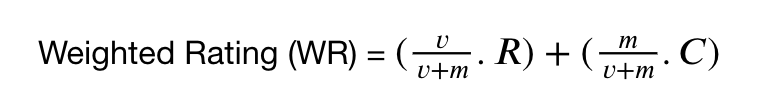

where:

*   v - number of votes for the movie
*   m - minimum votes required to be listed in Top 250
*   R - average rating for the movie
*   C - the mean rating across all the movies

For each movie we have v as vote_count and R as vote_average. 
The only values we need to find are C (calculating the mean value of all vote_average) and m (finding our own cutoff value)





In [5]:
C = movies['vote_average'].mean()
C

5.618207215134185

In [6]:
m = movies['vote_count'].quantile(0.9)
m

160.0

Let's filter all the movies that have less than m votes.

In [7]:
pop_movies = movies[movies['vote_count'] > m]
pop_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Adding a column for weighted rating

In [8]:
pop_movies['WR'] = pop_movies.apply(lambda row: (row.vote_count/(row.vote_count + m) * row.vote_average) + (m/(row.vote_count + m)* C), axis = 1)

C:\Users\acer\AppData\Local\Temp\ipykernel_24272\1118561598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_movies['WR'] = pop_movies.apply(lambda row: (row.vote_count/(row.vote_count + m) * row.vote_average) + (m/(row.vote_count + m)* C), axis = 1)


In [9]:
pop_moviess = pop_movies[['title', 'vote_average', 'vote_count', 'WR', 'original_language', 'genres']]

In [10]:
pop_moviess.sort_values('WR',ascending=False).head(10)

,title,vote_average,vote_count,WR,original_language,genres
314,The Shawshank Redemption,8.5,8358.0,8.445869,en,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
834,The Godfather,8.5,6024.0,8.425439,en,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
10309,Dilwale Dulhania Le Jayenge,9.1,661.0,8.421453,hi,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
12481,The Dark Knight,8.3,12269.0,8.265477,en,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name..."
2843,Fight Club,8.3,9678.0,8.256385,en,"[{'id': 18, 'name': 'Drama'}]"
292,Pulp Fiction,8.3,8670.0,8.251406,en,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n..."
522,Schindler's List,8.3,4436.0,8.206639,en,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
23673,Whiplash,8.3,4376.0,8.205404,en,"[{'id': 18, 'name': 'Drama'}]"
5481,Spirited Away,8.3,3968.0,8.196055,ja,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na..."
2211,Life Is Beautiful,8.3,3643.0,8.187171,it,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."


In [11]:
def get_list(x):
    x = x.split(',')
    genres = []
    for i in x:
      if i.startswith(" 'name': '"):
        i = i[10:-2]
        if i.endswith("'"):
          i = i[:-1]
        genres.append(str(i))
    return genres

features = ['genres']
for feature in features:
    pop_moviess[feature] = pop_moviess[feature].apply(get_list)

C:\Users\acer\AppData\Local\Temp\ipykernel_24272\314732267.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_moviess[feature] = pop_moviess[feature].apply(get_list)


In [12]:
pop_moviess.head()

,title,vote_average,vote_count,WR,original_language,genres
0,Toy Story,7.7,5415.0,7.640253,en,"[Animation, Comedy, Family]"
1,Jumanji,6.9,2413.0,6.820293,en,"[Adventure, Fantasy, Family]"
4,Father of the Bride Part II,5.7,173.0,5.660700,en,[Comedy]
5,Heat,7.7,1886.0,7.537201,en,"[Action, Crime, Drama, Thriller]"
8,Sudden Death,5.5,174.0,5.556626,en,"[Action, Adventure, Thriller]"


Having this list, we can filter it by genres and original_language to show us the most watched and best rated movies in a given category.

In [13]:
def filter_by_genre(genre, df):
  d = df
  for index, row in d.iterrows():
    if genre not in row['genres']:
      d.drop(labels=index, inplace=True)
  return d

In [14]:
def give_rec(by='WR', pop_moviess=pop_moviess, genre=None, lan=None):
  df = pop_moviess
  if lan is None:
    pass
  else:
    df = df[df['original_language'] == lan]
  if genre is None:
    pass
  else:
    df = filter_by_genre(genre, df)
  return df.sort_values(by,ascending=False).head(10)

In [15]:
give_rec(by='WR', genre='Family')

C:\Users\acer\AppData\Local\Temp\ipykernel_24272\1313848120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop(labels=index, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_24272\1313848120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop(labels=index, inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_24272\1313848120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop(labels=index, inplace=True

,title,vote_average,vote_count,WR,original_language,genres
5481,Spirited Away,8.3,3968.0,8.196055,ja,"[Fantasy, Adventure, Animation, Family]"
1225,Back to the Future,8.0,6239.0,7.940446,en,"[Adventure, Comedy, Science Fiction, Family]"
359,The Lion King,8.0,5520.0,7.932907,en,"[Family, Animation, Drama]"
30315,Inside Out,7.9,6737.0,7.847066,en,"[Drama, Comedy, Animation, Family]"
17437,Harry Potter and the Deathly Hallows: Part 2,7.9,6141.0,7.842059,en,"[Family, Fantasy, Adventure]"
5833,My Neighbor Totoro,8.0,1730.0,7.798367,ja,"[Fantasy, Animation, Family]"
13724,Up,7.8,7048.0,7.751570,en,"[Animation, Comedy, Family, Adventure]"
12704,WALL·E,7.8,6439.0,7.747100,en,"[Animation, Family]"
24455,Big Hero 6,7.8,6289.0,7.745870,en,"[Adventure, Family, Animation, Action, Comedy]"
926,It's a Wonderful Life,8.0,1103.0,7.698269,en,"[Drama, Family, Fantasy]"


In [16]:
give_rec(by='WR', genre='Family', lan='ja')

,title,vote_average,vote_count,WR,original_language,genres
5481,Spirited Away,8.3,3968.0,8.196055,ja,"[Fantasy, Adventure, Animation, Family]"
5833,My Neighbor Totoro,8.0,1730.0,7.798367,ja,"[Fantasy, Animation, Family]"
6212,Castle in the Sky,7.8,877.0,7.463369,ja,"[Adventure, Fantasy, Animation, Action, Family..."
20779,Wolf Children,8.0,483.0,7.407330,ja,"[Animation, Drama, Family, Fantasy]"
13264,Ponyo,7.5,953.0,7.229482,ja,"[Animation, Family]"
16383,The Secret World of Arrietty,7.4,701.0,7.068889,ja,"[Fantasy, Animation, Family]"
9068,Whisper of the Heart,7.7,349.0,7.045605,ja,"[Animation, Drama, Family]"
9405,The Cat Returns,7.2,364.0,6.717010,ja,"[Adventure, Fantasy, Animation, Drama, Family]"
3677,Pokémon: The Movie 2000,6.4,201.0,6.053499,ja,"[Adventure, Fantasy, Animation, Science Fictio..."


# Content based filtering - description

To find simillar movies descriptions we will use a basic NLP technique, which is **TF-IDF** (Term Frequency-Inverse Document Frequency).

As the name suggest this method is based on the **frequency of words** in document. It is based on the idea that **rare words contain more information **about the content of the document than common words. 

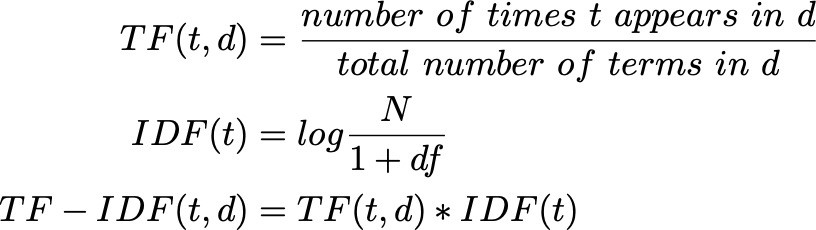

where:


*   t - term
*   d - document

*   N - total number of documents
*   df - number of documents with the term t





In [17]:
movie = movies[movies['vote_count'] > movies['vote_count'].quantile(0.5)]

Due to limited RAM we will limit our movies to half of the titles

In [18]:
movie['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

We will compare the overview columns using the method mentioned above.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
movie['overview'] = movie['overview'].fillna('')

C:\Users\acer\AppData\Local\Temp\ipykernel_24272\3440350285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['overview'] = movie['overview'].fillna('')


Firstly, we removed all stop words, such as 'a', 'the', 'an'. Then we filled empty owerviews with an empty string ''.

In [20]:
tfidf_matrix = tfidf.fit_transform(movie['overview'])
tfidf_matrix.shape

(21760, 48083)

constructing a matrix using a fit_transform method.

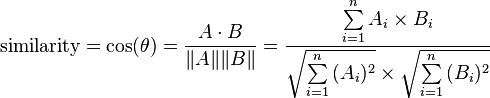

To calculate the similarity of description we will use cosine similarity. It is a method of calculating distance in multi-dimensional planes.

In [21]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [22]:
indices = pd.Series(movie.index, index=movie['title']).drop_duplicates()

Defining the function to give 10 movies with the most similar description to the input title.


In [23]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movie['title'].iloc[movie_indices]

In [24]:
get_recommendations("Dracula: Dead and Loving It")

21540                            Dracula 3D
181                                   Nadja
3905                           Dracula 2000
8689                      Dracula A.D. 1972
1291                                Dracula
5512                      Horror of Dracula
451                                   Fresh
10526                 The Brides of Dracula
32235    Van Helsing: The London Assignment
10036                      Vampire Hunter D
Name: title, dtype: object

# Collaborative filtering

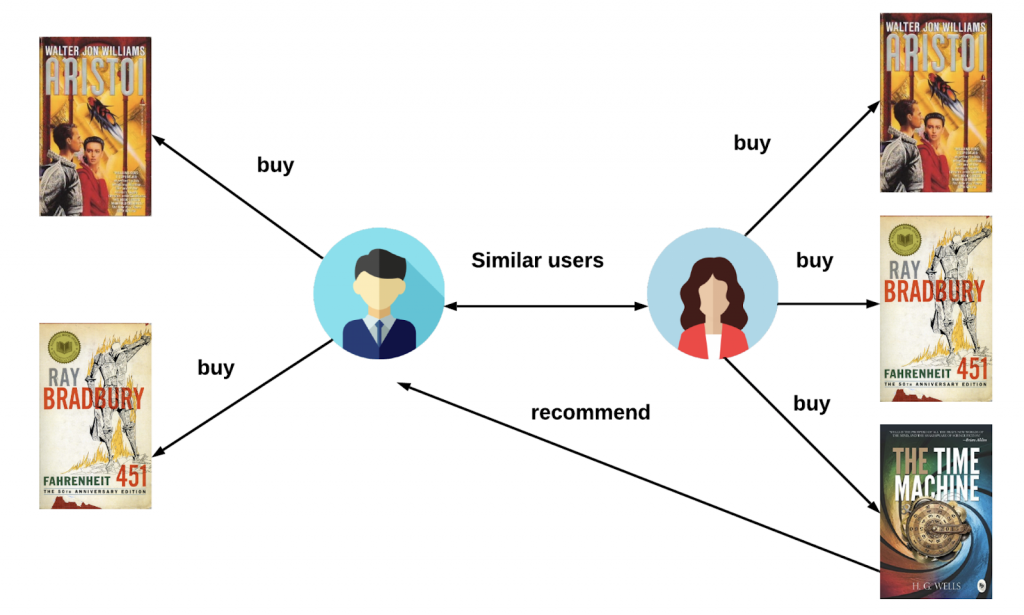

**Collaborative filtering** uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can **recommend an item to user A based on the interests of a similar user B**. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.

[source]()

We will use **SVD** algorithm from sueprise library.

The **Singular Value Decomposition** (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. 

Its used for making prediction based on similarities of users and products. In our case it takes users-movies matrix, and decomposes it into 3 matrices, so that the multiplication of them is the closest to original matrix. It's based on fancy algebraic transformations, but we don't need to worry about it. 

In [25]:
import surprise
ratings = pd.read_csv('ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [26]:
reader = surprise.Reader()

In [27]:
from surprise import Dataset
from surprise import SVD


In [28]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [29]:
svd = SVD()

In [30]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [53]:
usr_55 = ratings[ratings['userId'] == 55]
usr_55

,userId,movieId,rating,timestamp
8222,55,1,3.0,855926941
8223,55,5,3.0,855926988
8224,55,6,5.0,855926988
8225,55,7,2.0,855926988
8226,55,9,3.0,855927315
8227,55,32,4.0,855926941
8228,55,65,5.0,855927315
8229,55,74,3.0,855927438
8230,55,79,3.0,855927172
8231,55,95,3.0,855926941


Real ratings of user with id 55:

In [31]:
ratings[ratings['userId'] == 55]

,userId,movieId,rating,timestamp
8222,55,1,3.0,855926941
8223,55,5,3.0,855926988
8224,55,6,5.0,855926988
8225,55,7,2.0,855926988
8226,55,9,3.0,855927315
8227,55,32,4.0,855926941
8228,55,65,5.0,855927315
8229,55,74,3.0,855927438
8230,55,79,3.0,855927172
8231,55,95,3.0,855926941


svd.predict(user_id, movie_id, true_value) => predicted value

In [32]:
svd.predict(55, 805, 5)

Prediction(uid=55, iid=805, r_ui=5, est=4.126992880231689, details={'was_impossible': False})

for movie 805 true value was 5 and predicted value 4.35

In [33]:
svd.predict(55, 784, 3)#movie with id=784 is "Himenóptero"

Prediction(uid=55, iid=784, r_ui=3, est=3.0273786317714877, details={'was_impossible': False})

for movie 784 true value was 3 and predicted value 3.05

In [34]:
error = 0.0
num_of_records = 0
for  _, real_rating in ratings[ratings['userId'] == 55].iterrows():
   predicted = svd.predict(55, real_rating['movieId'], real_rating['rating'])[3]
   print("Expected: {}, predicted: {}".format(real_rating['rating'], predicted))
   num_of_records += 1
   error += abs(real_rating['rating'] - predicted)

print("Average error in Matrix Method while predicting movie rating is ", error/num_of_records)

Expected: 3.0, predicted: 3.9363271566998854
Expected: 3.0, predicted: 3.4485902650678244
Expected: 5.0, predicted: 4.3911430992195575
Expected: 2.0, predicted: 3.3014094033516206
Expected: 3.0, predicted: 3.377579907361234
Expected: 4.0, predicted: 4.057849591396938
Expected: 5.0, predicted: 2.947595316248621
Expected: 3.0, predicted: 3.350296604206839
Expected: 3.0, predicted: 3.184375392034109
Expected: 3.0, predicted: 3.3761921942993087
Expected: 3.0, predicted: 3.4627697059820424
Expected: 5.0, predicted: 4.179776512075188
Expected: 3.0, predicted: 3.453022561305577
Expected: 4.0, predicted: 3.9102660671111025
Expected: 5.0, predicted: 4.419281436323662
Expected: 4.0, predicted: 3.6791907281732943
Expected: 3.0, predicted: 3.661299326514078
Expected: 3.0, predicted: 4.262339917682381
Expected: 3.0, predicted: 3.2692168697115283
Expected: 4.0, predicted: 3.5817422911012384
Expected: 5.0, predicted: 4.329500363147925
Expected: 4.0, predicted: 3.454179919318046
Expected: 2.0, predict

In [36]:
testset = trainset.build_anti_testset()
predictions = svd.test(testset)

In [37]:
from collections import defaultdict
def get_top_n_all(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [38]:
def get_top_n_user(uid, predictions, n=10):
  top_n_all = get_top_n_all(predictions, n=10)
  top_n_user = top_n_all[uid]
  df = pd.DataFrame(top_n_user, columns =['film_id', 'predicted_rating'])
  return(df)


In [65]:
get_top_n_user(55, predictions)

,film_id,predicted_rating
0,1221,4.908524
1,8132,4.773189
2,745,4.729118
3,858,4.725832
4,4226,4.716037
5,926,4.711364
6,3983,4.674891
7,1225,4.674547
8,7502,4.668318
9,306,4.656791


In [51]:
def get_top_n_user_desc(uid, predictions, n=5, moviesdf=movies_SVD):
  top_n_all = get_top_n_all(predictions, n=5)
  top_n_user = top_n_all[uid]
  df = pd.DataFrame(top_n_user, columns =['film_id', 'predicted_rating'])
  merged = df.merge(moviesdf, left_on='film_id', right_on='filmid', how='left')
  return(merged)

In [69]:
get_top_n_user_desc(55, predictions) #5 prediction per user


,film_id,predicted_rating,title,genres,overview
0,1221,4.908524,Unforgiven,[Western],"William Munny is a retired, once-ruthless kill..."
1,8132,4.773189,Superbabies: Baby Geniuses 2,"[Comedy, Family]","Following on from the plot of the last movie, ..."
2,745,4.729118,The Last of the High Kings,"[Drama, Comedy]","It is 1977, Dublin rocks to the music of Thin ..."
3,858,4.725832,Bogus,"[Fantasy, Comedy, Family]","Recently orphaned, a young boy is taken in by ..."
4,4226,4.716037,Unlawful Entry,"[Crime, Thriller]","After a break-in at their house, a couple gets..."


In [63]:
dl_predict_movie_start = datetime.now()
for i in range(1): #measure performance for predicting 5 movies for 30 users 
    get_top_n_user_desc(i, predictions)
dl_predict_movie_end = datetime.now()
print(dl_predict_movie_end - dl_predict_movie_start)

0:00:04.343123


In [66]:
usr_100 = ratings[ratings['userId'] == 88]
usr_100 = usr_55.merge(movies_SVD, left_on='movieId', right_on='filmid', how='left')
usr_100

,userId,movieId,rating,timestamp,title,genres,overview
0,55,1,3.0,855926941,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...
1,55,5,3.0,855926988,Heat,"[Action, Crime, Drama, Thriller]","Obsessive master thief, Neil McCauley leads a ..."
2,55,6,5.0,855926988,Sabrina,"[Comedy, Romance]",An ugly duckling having undergone a remarkable...
3,55,7,2.0,855926988,Tom and Huck,"[Action, Adventure, Drama, Family]","A mischievous young boy, Tom Sawyer, witnesses..."
4,55,9,3.0,855927315,GoldenEye,"[Adventure, Action, Thriller]",James Bond must unmask the mysterious head of ...
5,55,32,4.0,855926941,Wings of Courage,"[Romance, Adventure]",NaN
6,55,65,5.0,855927315,Lawnmower Man 2: Beyond Cyberspace,"[Action, Science Fiction]",Jobe is resuscitated by Jonathan Walker. He wa...
7,55,74,3.0,855927438,Big Bully,"[Comedy, Family]",A writer returns to his hometown where he face...
8,55,79,3.0,855927172,The White Balloon,"[Family, Drama]",Several people try to take advantage of a litt...
9,55,95,3.0,855926941,La Haine,[Drama],Aimlessly whiling away their days in the concr...
